In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /Linear-Regression/FuelConsumptionCo2.csv")
df.head(9)

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

# Multiple Regression
**Uses multiple variable to predict depended values**



---


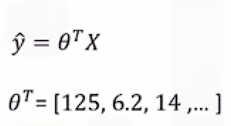

**theta is features values**

In [ ]:
mask = np.random.rand(len(df)) < 0.8
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']] #features for prediction
train = cdf[mask]
test = cdf[~mask]

x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

print("coefficients",regr.coef_)

preds = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_true = test['CO2EMISSIONS']

plt.figure(figsize=(10, 5))
plt.plot(test.index,preds, label="Predicted Values", color="red", linestyle="--")
plt.plot(test.index,y_true.values, label="True Values", color="green")
plt.title("Predicted vs True CO2 Emissions")
plt.xlabel("Sample Index")
plt.ylabel("CO2 Emissions")
plt.legend(loc="best")
plt.show()
print("Error in Data : ",np.mean((preds-y_test)**2))
print("Data Accuracy: ", regr.score(x_test,y_test)*100)

# Conclusion
1.   Simple Linear regression uses single independent variable to predict dependent variable
2.   Multiple linear regression uses multiple variables to predict dependent variables
3.   in linear regression we use OLS Ordinary Least Squares which tries to minimize the mean square error between true and predicted values
4.   mean squared method is used to find error in data





In [ ]:
from sklearn.model_selection import train_test_split
features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
x = df[features]
y = df["CO2EMISSIONS"]

x_train,x_test,y_train,y_test = train_test_split(x,y)

regr.fit(x_train,y_train)
print(regr.coef_)
preds = regr.predict(x_test)
plt.figure(figsize=(10,5))
plt.plot(y_test.values,label="True Values",color="red",linestyle="--")
plt.plot(preds,label="Predicted Values",color="Green")
plt.xlabel("Sample Index")
plt.ylabel("Coemmisions")
plt.title("True vs Preds")
plt.legend(loc="best")
plt.show()

print("Error in Predictions : ",np.mean((preds-y_test)**2))
print("accuracy of model : ",r2_score(y_test,preds) * 100)